In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
sns.set_style('whitegrid')

In [27]:
# Read data
daily_activity = pd.read_csv('../data/dailyActivity_merged.csv',parse_dates=['ActivityDate'])

daily_activity

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-03-25,11004,7.110000,7.110000,0.0,2.57,0.46,4.07,0.00,33,12,205,804,1819
1,1503960366,2016-03-26,17609,11.550000,11.550000,0.0,6.92,0.73,3.91,0.00,89,17,274,588,2154
2,1503960366,2016-03-27,12736,8.530000,8.530000,0.0,4.66,0.16,3.71,0.00,56,5,268,605,1944
3,1503960366,2016-03-28,13231,8.930000,8.930000,0.0,3.19,0.79,4.95,0.00,39,20,224,1080,1932
4,1503960366,2016-03-29,12041,7.850000,7.850000,0.0,2.16,1.09,4.61,0.00,28,28,243,763,1886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,8877689391,2016-04-08,23014,20.389999,20.389999,0.0,11.10,0.63,8.62,0.00,70,29,359,982,4196
453,8877689391,2016-04-09,16470,8.070000,8.070000,0.0,0.00,0.02,8.02,0.00,90,9,289,1052,3841
454,8877689391,2016-04-10,28497,27.530001,27.530001,0.0,21.92,1.12,4.46,0.00,128,46,211,1055,4526
455,8877689391,2016-04-11,10622,8.060000,8.060000,0.0,1.47,0.15,6.37,0.01,18,7,225,1190,2820


In [28]:
# check data points per unique id
id_data_counts = daily_activity['Id'].value_counts().reset_index()

# subset to keep if records are 10 or more because of regression modeling
id_data_counts = id_data_counts[id_data_counts['count'] >= 10]

id_data_counts

,Id,count
0,4020332650,32
1,4057192912,32
2,1503960366,19
3,1624580081,19
4,4702921684,15
5,2347167796,15
6,4445114986,15
7,6962181067,14
8,8792009665,12
9,2026352035,12


In [29]:
#Reverencing acticle https://www.measurement-toolkit.org/physical-activity/objective-methods/pedometers?utm_source=chatgpt.com

# Tudor-Locke & Bassett: Classification of step-based activity levels:

# <5,000 steps/day = sedentary

# 5,000–7,499 = low active

# 7,500–9,999 = somewhat active

# ≥10,000 = active

# >12,500 = highly active

In [ ]:
# Subsetting data for only id with 10 or more records

daily_activity = daily_activity[daily_activity['Id'].isin(id_data_counts['Id'])]
daily_activity = daily_activity.sort_values(by=['Id','ActivityDate'])

#Subset for columns of interest
daily_activity = daily_activity[['Id','ActivityDate','TotalSteps']]

#log base for total steps
daily_activity['LogTotalSteps'] = np.log1p(daily_activity['TotalSteps'])

#create a day of week column
daily_activity['Day'] = daily_activity['ActivityDate'].dt.day_of_week

#segregate data into exercide and not exercising
daily_activity['NoExercise'] = np.where(
    daily_activity['TotalSteps'] < 5000,1,0
)

daily_activity

,Id,ActivityDate,TotalSteps,LogTotalSteps,Day,NoExercise
0,1503960366,2016-03-25,11004,9.306105,4,0
1,1503960366,2016-03-26,17609,9.776222,5,0
2,1503960366,2016-03-27,12736,9.452266,6,0
3,1503960366,2016-03-28,13231,9.490393,0,0
4,1503960366,2016-03-29,12041,9.396156,1,0
...,...,...,...,...,...,...
452,8877689391,2016-04-08,23014,10.043901,4,0
453,8877689391,2016-04-09,16470,9.709357,5,0
454,8877689391,2016-04-10,28497,10.257589,6,0
455,8877689391,2016-04-11,10622,9.270777,0,0


In [33]:
daily_activity[['TotalSteps','LogTotalSteps','NoExercise']].corr()

,TotalSteps,LogTotalSteps,NoExercise
TotalSteps,1.000000,0.677553,-0.772288
LogTotalSteps,0.677553,1.000000,-0.645362
NoExercise,-0.772288,-0.645362,1.000000


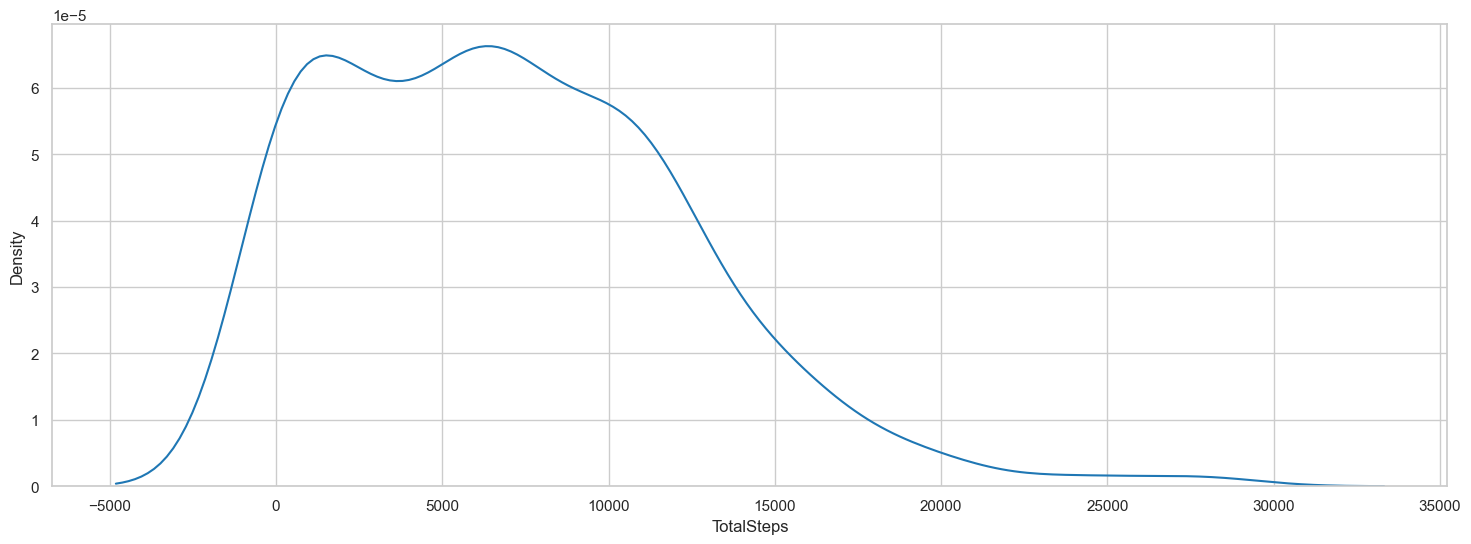

In [31]:
plt.figure(figsize=(18,6),dpi=100)
sns.kdeplot(data=daily_activity,x='TotalSteps')
plt.show()

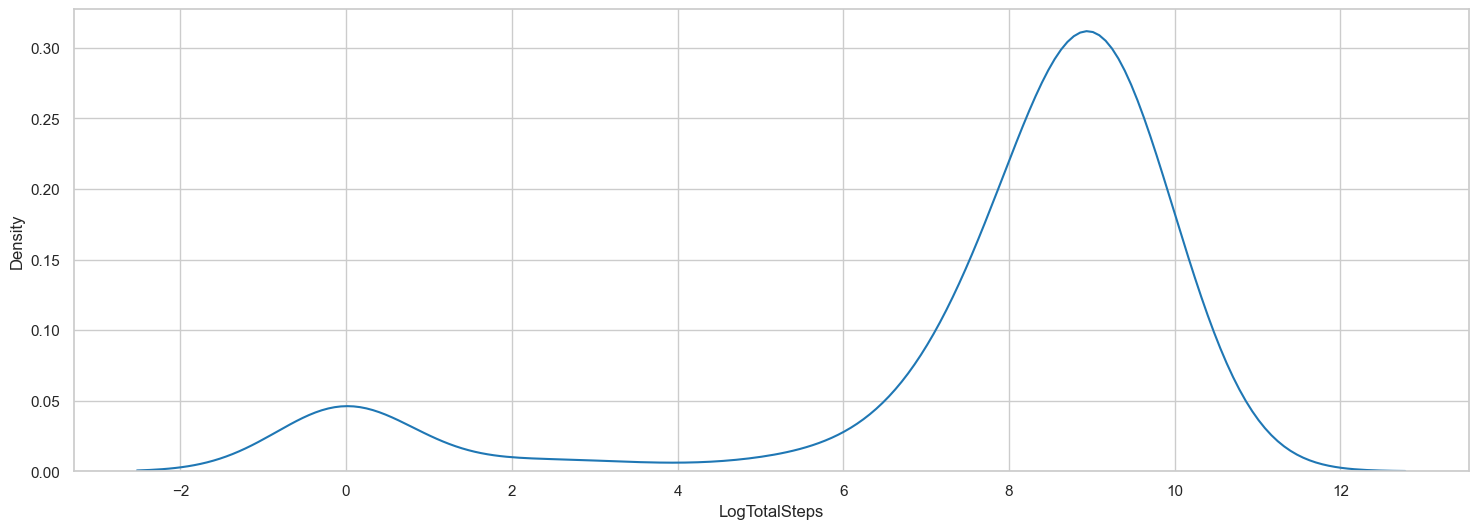

In [32]:
plt.figure(figsize=(18,6),dpi=100)
sns.kdeplot(data=daily_activity,x='LogTotalSteps')
plt.show()